# Linear Regression Assignment

## •oAnalysis and Building Linear Regression Model for Sklearn Boston Dataset o•<Br>


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
#bos = pd.DataFrame(boston.data)

In [2]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#getting the dictonary name values of Boston data
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
#including the Target (Price) column to main features_names dataframe from Boston dictonary dataset 
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Column Names:**<br>

**CRIM:** Per capita crime rate by town<br>
**ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft<br>
**INDUS:** Proportion of non-retail business acres per town<br>
**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
**NOX:** Nitric oxide concentration (parts per 10 million)<br>
**RM:** Average number of rooms per dwelling<br>
**AGE:** Proportion of owner-occupied units built prior to 1940<br>
**DIS:** Weighted distances to five Boston employment centers<br>
**RAD:** Index of accessibility to radial highways<br>
**TAX:** Full-value property tax rate per 10,000 dollar<br>
**PTRATIO:** Pupil-teacher ratio by town<br>
**B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town<br>
**LSTAT:** Percentage of lower status of the population<br>
**MEDV:** Median value of owner-occupied homes in $1000s<br>
**Price:** Final Price <br>

In [5]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
bos.shape

(506, 14)

In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
#check for null values
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
#creat Features and Label
X=bos.drop('PRICE', axis=1)
y=bos['PRICE']

<AxesSubplot:xlabel='B', ylabel='LSTAT'>

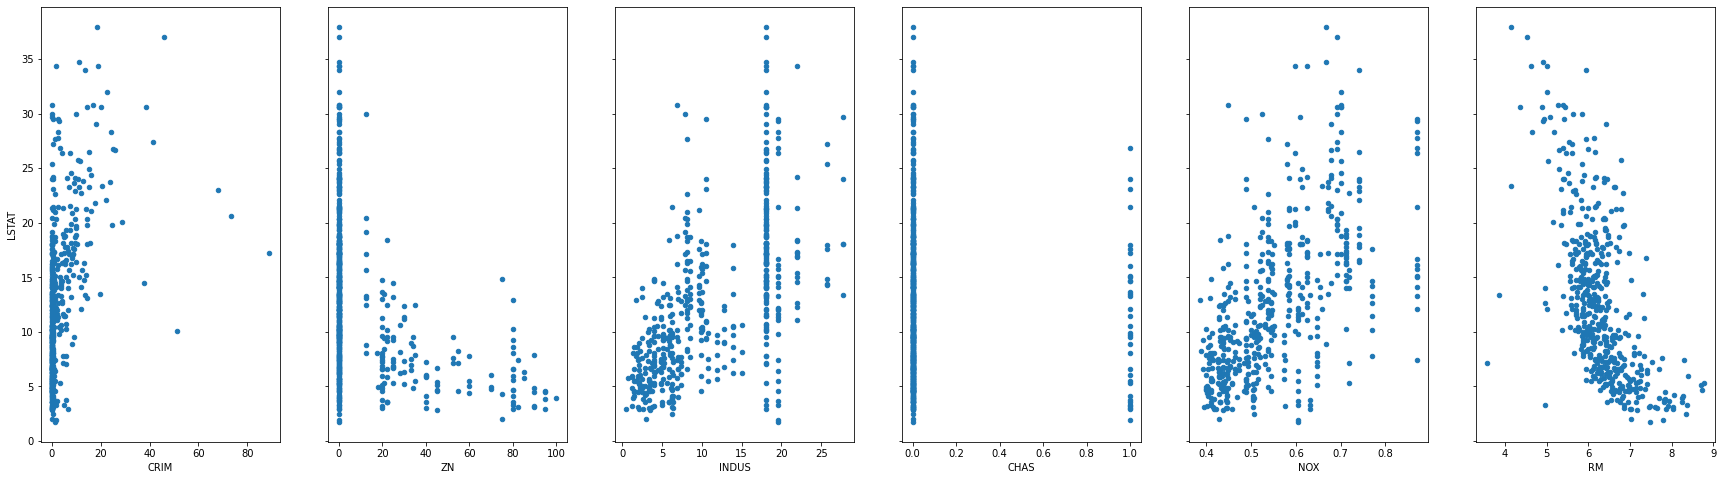

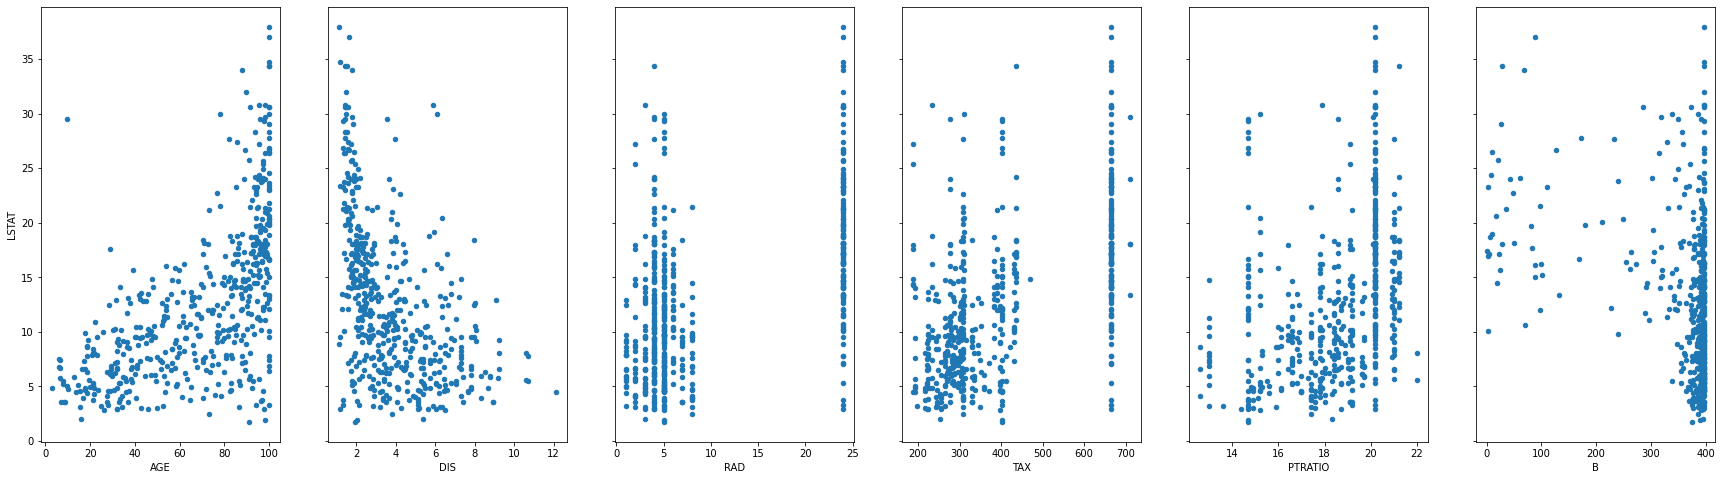

In [9]:
fig, axs = plt.subplots(1, 6, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='LSTAT', ax=axs[0], figsize=(30, 8))
bos.plot(kind='scatter', x='ZN', y='LSTAT', ax=axs[1])
bos.plot(kind='scatter', x='INDUS', y='LSTAT', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='LSTAT', ax=axs[3])
bos.plot(kind='scatter', x='NOX', y='LSTAT', ax=axs[4])
bos.plot(kind='scatter', x='RM', y='LSTAT', ax=axs[5])
fig, axs = plt.subplots(1, 6, sharey=True)
bos.plot(kind='scatter', x='AGE', y='LSTAT', ax=axs[0], figsize=(30, 8))
bos.plot(kind='scatter', x='DIS', y='LSTAT', ax=axs[1])
bos.plot(kind='scatter', x='RAD', y='LSTAT', ax=axs[2])
bos.plot(kind='scatter', x='TAX', y='LSTAT', ax=axs[3])
bos.plot(kind='scatter', x='PTRATIO', y='LSTAT', ax=axs[4])
bos.plot(kind='scatter', x='B', y='LSTAT', ax=axs[5])

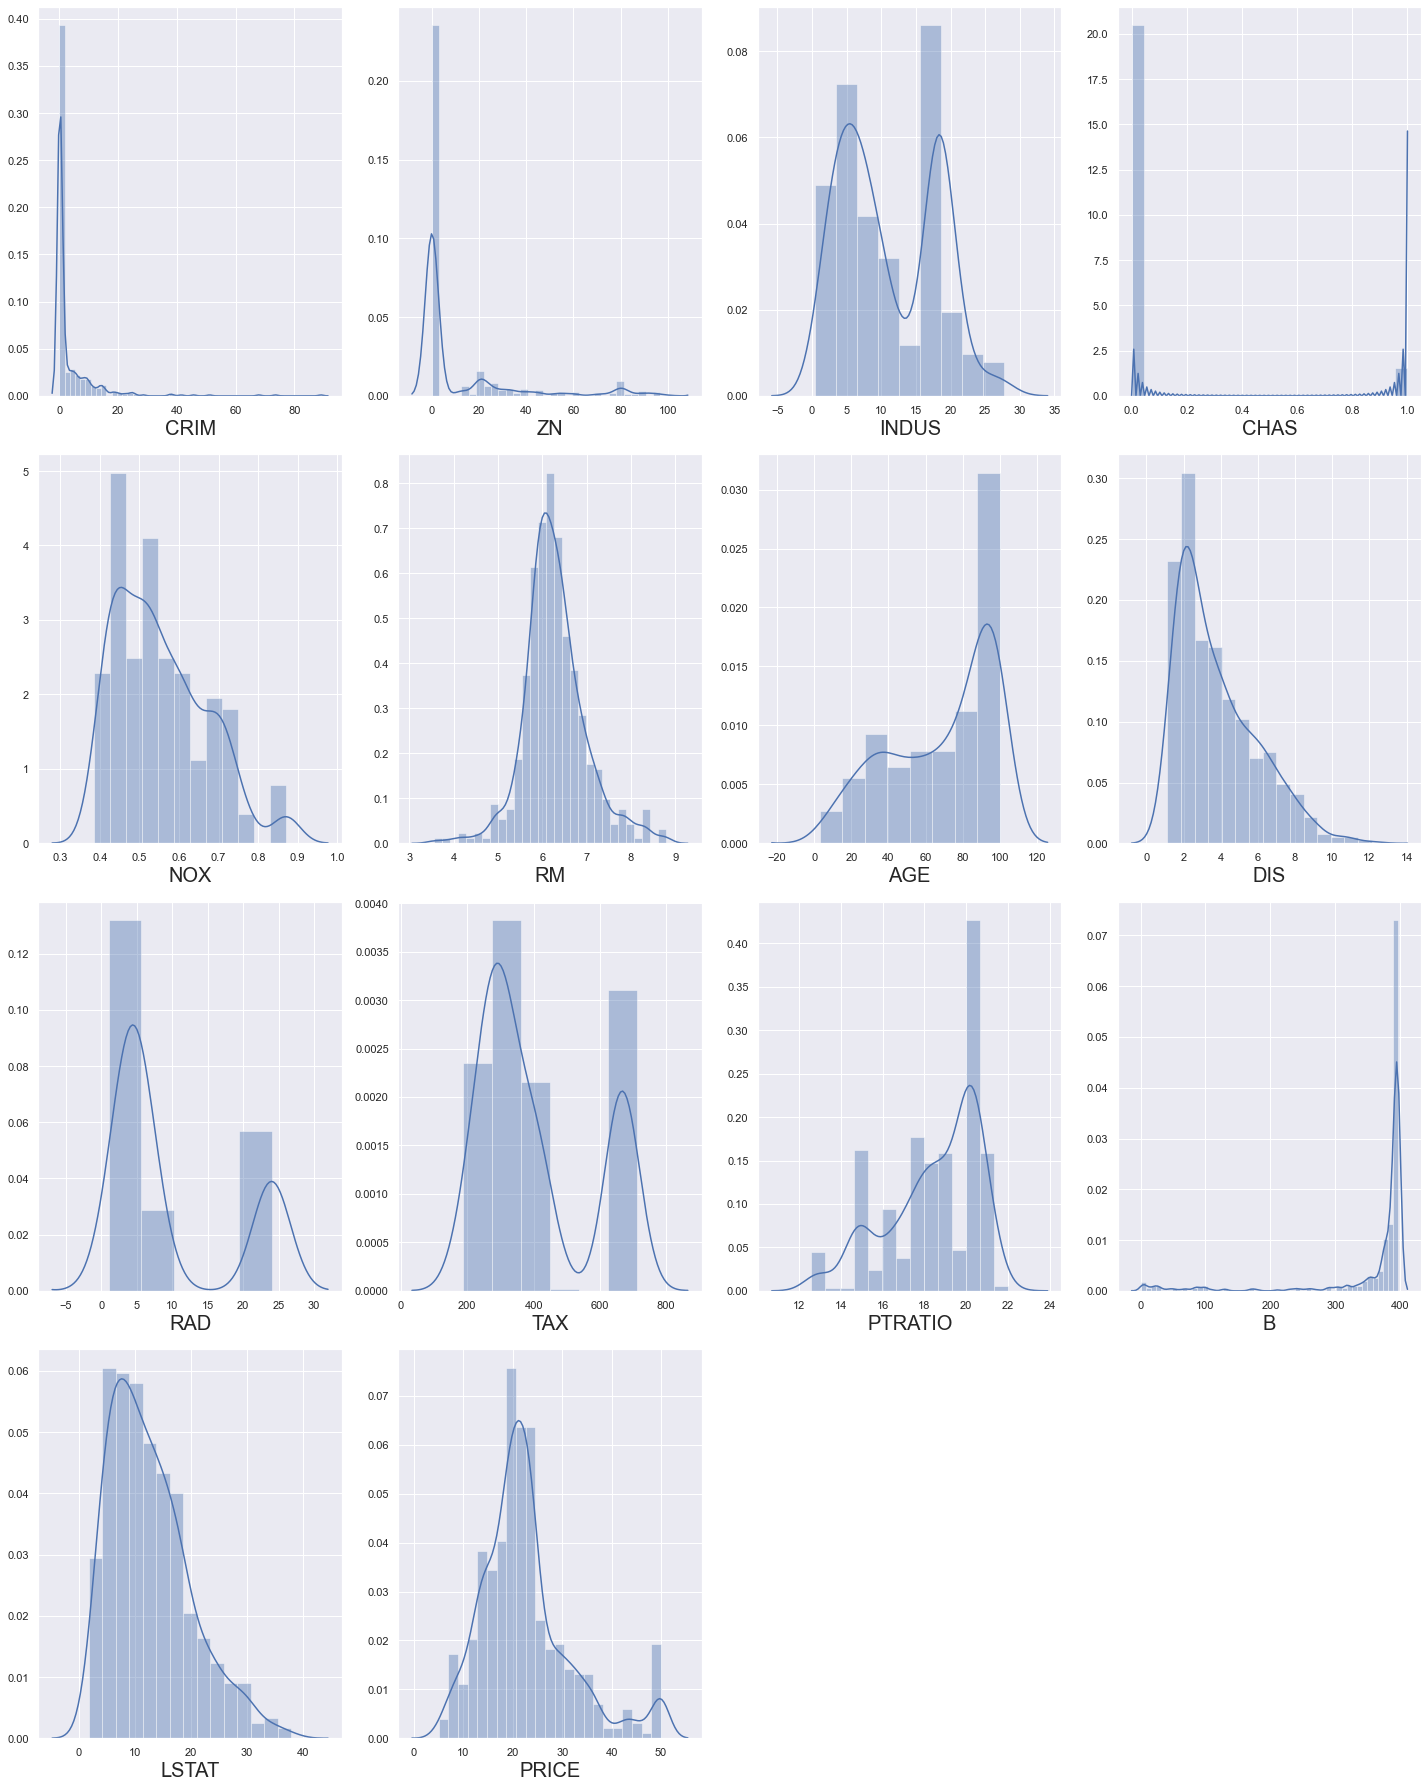

In [10]:
# let's see how data is distributed for every column
import seaborn as sns
sns.set()
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

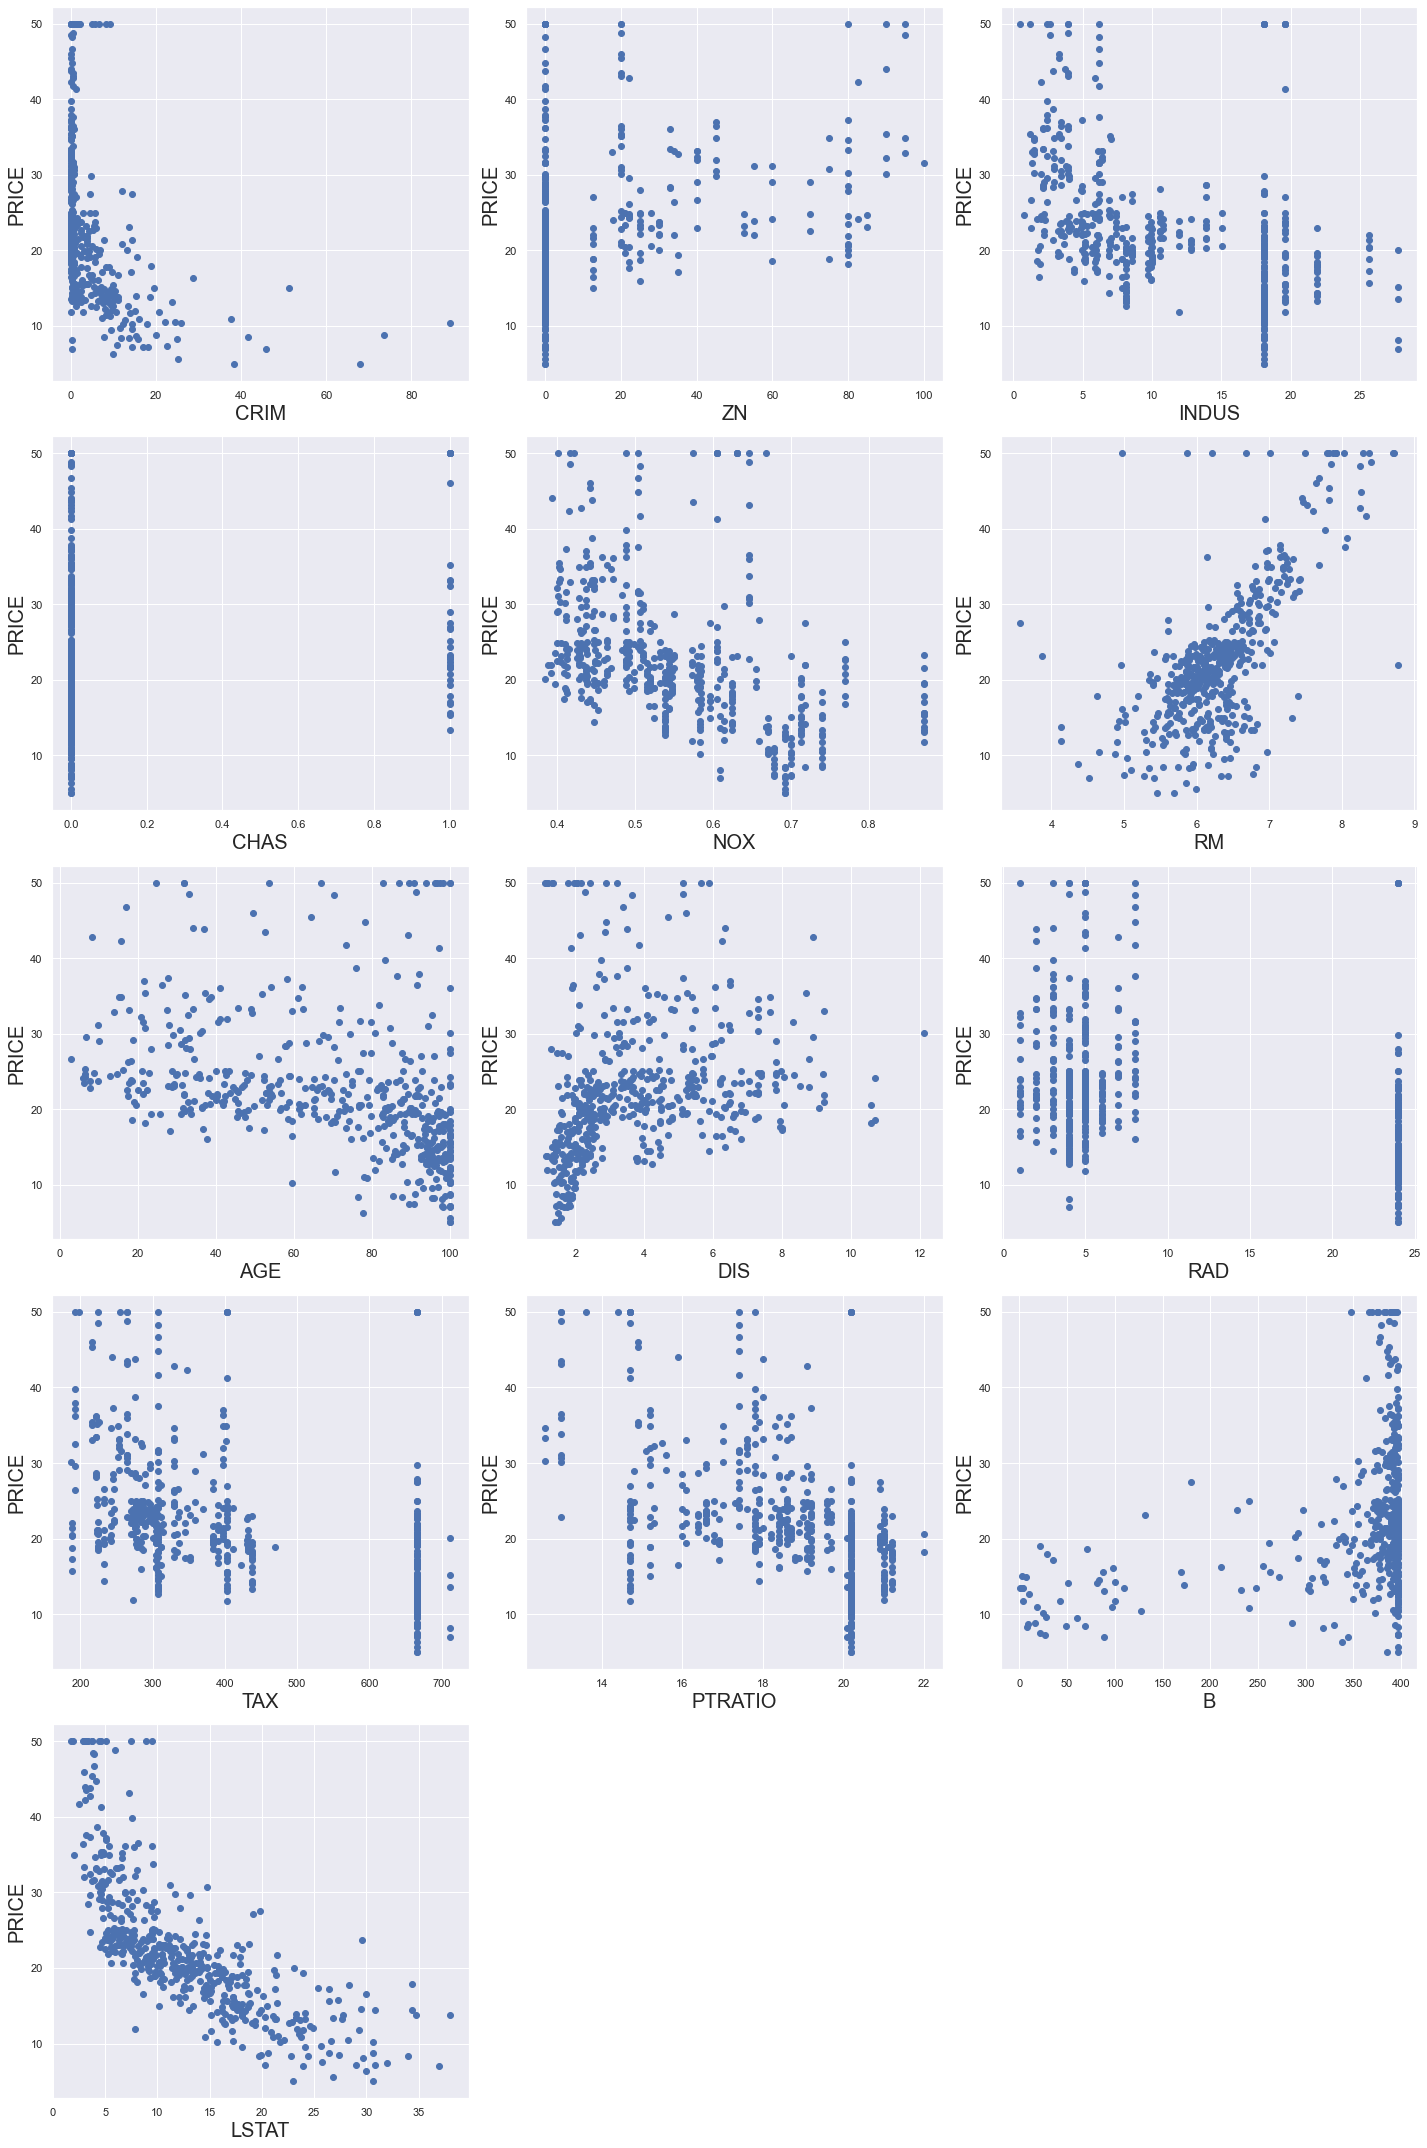

In [11]:
## Let's observe the relationship between independent variables and dependent variable.
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Fields are having Linear relationship

In [10]:
# Check for multicolinearity

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Multi collinearity is less than 10 so , we can proceed

In [11]:
# Lets Split the date into training and testing data and train them
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#Checking the OLS model
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='PRICE ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=bos).fit()
print(lm1.summary())
print(lm1.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        13:04:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [13]:
# saving the model to the local file system
filename = 'finalized_assignment_model2.pickle'
pickle.dump(regression_model, open(filename, 'wb'))

In [14]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]]))
a

array([30.10184757])

In [32]:
print(regression_model.score(x_train,y_train))
print(regression_model.score(x_test,y_test))


0.730647531347494
0.7519030329262334


In [25]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [26]:
print(adj_r2(x_train,y_train))
print(adj_r2(x_test,y_test))

0.7210541557516514
0.7233609039708444


In [27]:
y_predict =regression_model.predict(x_test)

In [33]:
# Let's see if our model is overfitting our training data.
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [34]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [35]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_reg.score(x_test, y_test)

0.7518957038694828

In [37]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.0646242578600853

In [39]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)

0.7518683510482335

In [42]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)
print(elasticCV.alpha_)
print(elasticCV.l1_ratio)

0.013238147250836645
0.5


In [48]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
elasticnet_reg.score(x_test,y_test)

0.7503011494807525